In [2]:
import pandas as pd 
data = "C:\\Users\\sowky\\Downloads\\winemag-data-130k-v2.json"
# reading the fie and print
df = pd.read_json(data)
df.sample(10)

points                                              title  \
98850       88  Burbank Ranch 2013 Little Rascal Estate Grown ...   
60377       84                Jax 2010 Cabernet Franc (Calistoga)   
82834       95  Broadside 2013 Ephemera Cabernet Sauvignon (Pa...   
122610      84  Wynns Coonawarra Estate 2001 Chardonnay (Coona...   
82402       88              Boxwood 2014 Trellis Red (Middleburg)   
100603      87  Bortolotti NV Prosecco 47 Extra Dry  (Prosecco...   
96793       90  William Cole 2011 Bill Limited Edition Chardon...   
73787       87             Stobi 2011 Macedon Pinot Noir (Tikves)   
16380       92  Barbieri 2014 Rodney's Vineyard Syrah (Santa B...   
105040      91  Elena Walch 2008 Castel Ringberg Riserva Chard...   

                                              description        taster_name  \
98850   This uncommon Italian grape gets a good showin...      Matt Kettmann   
60377   Alcohol gives this wine a hot aroma and taste,...               None   
82834   Brian and Stephy Terrizzi have added this luxu...      Matt Kettmann   
122610  Yellow fruit nuances abound in this slightly s...     Joe Czerwinski   
82402   Fresh and bright, the nose of this wine is fil...       Carrie Dykes   
100603  A distinctly different Prosecco with a colorfu...               None   
96793   With mild white-fruit aromas, dusty notes and ...  Michael Schachner   
73787   This garnet-colored Pinot Noir is named after ...       Jeff Jenssen   
16380   Full and piquant aromas of black fruit, purple...      Matt Kettmann   
105040  This gorgeous Riserva Chardonnay shows modern ...               None   

       taster_twitter_handle  price                 designation  \
98850          @mattkettmann   29.0  Little Rascal Estate Grown   
60377                   None   50.0                        None   
82834          @mattkettmann  125.0                    Ephemera   
122610                @JoeCz    9.0                        None   
82402                   None   22.0                     Trellis   
100603                  None   19.0       Prosecco 47 Extra Dry   
96793            @wineschach   35.0        Bill Limited Edition   
73787         @worldwineguys   15.0                     Macedon   
16380          @mattkettmann   48.0           Rodney's Vineyard   
105040                  None   36.0     Castel Ringberg Riserva   

                         variety                   region_1       region_2  \
98850                     Arneis                Paso Robles  Central Coast   
60377             Cabernet Franc                  Calistoga           Napa   
82834         Cabernet Sauvignon                Paso Robles  Central Coast   
122610                Chardonnay                 Coonawarra           None   
82402   Bordeaux-style Red Blend                 Middleburg           None   
100603                  Prosecco  Prosecco di Valdobbiadene           None   
96793                 Chardonnay                       None           None   
73787                 Pinot Noir                       None           None   
16380                      Syrah       Santa Barbara County  Central Coast   
105040                Chardonnay                 Alto Adige           None   

                  province    country                   winery  
98850           California         US            Burbank Ranch  
60377           California         US                      Jax  
82834           California         US                Broadside  
122610     South Australia  Australia  Wynns Coonawarra Estate  
82402             Virginia         US                  Boxwood  
100603              Veneto      Italy               Bortolotti  
96793    Casablanca Valley      Chile             William Cole  
73787               Tikves  Macedonia                    Stobi  
16380           California         US                 Barbieri  
105040  Northeastern Italy      Italy              Elena Walch

In [3]:
df['length'] = df['description'].str.len()
df.describe()

points          price         length
count  129971.000000  120975.000000  129971.000000
mean       88.447138      35.363389     242.601065
std         3.039730      41.022218      66.584276
min        80.000000       4.000000      20.000000
25%        86.000000      17.000000     197.000000
50%        88.000000      25.000000     237.000000
75%        91.000000      42.000000     282.000000
max       100.000000    3300.000000     829.000000

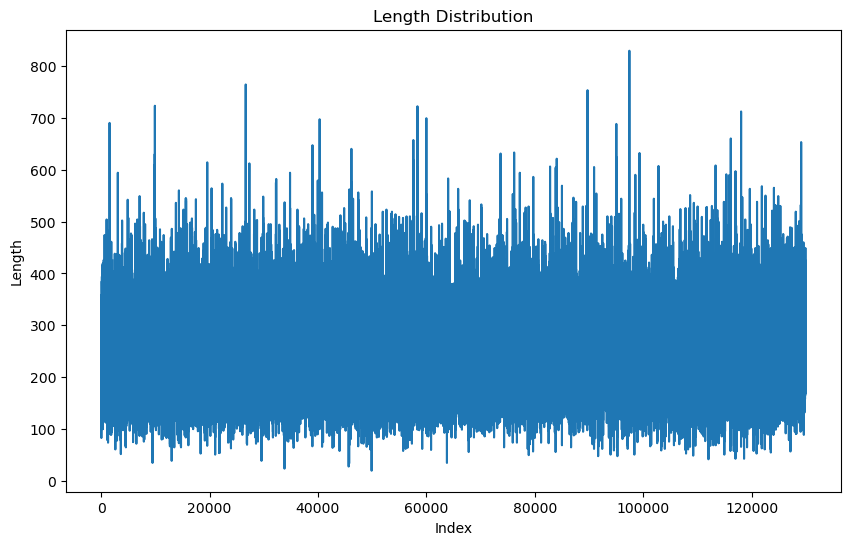

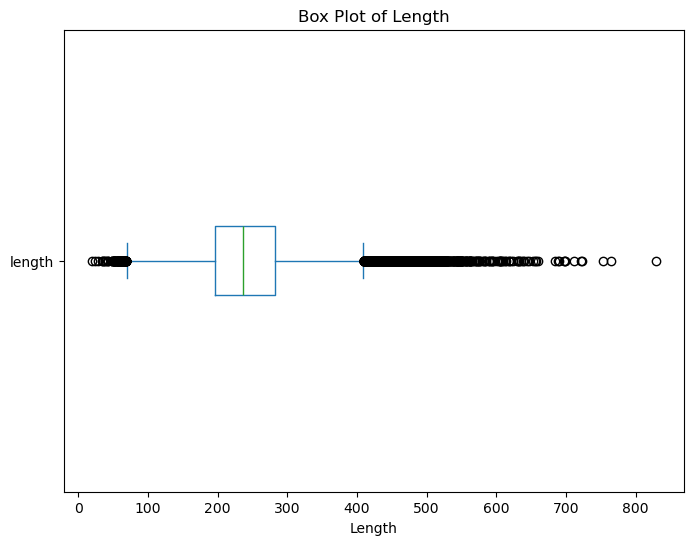

In [4]:
import matplotlib.pyplot as plt

# Line plot
plt.figure(figsize=(10, 6))  # Increase figure size
df['length'].plot()
plt.xlabel('Index')  # Add x-axis label
plt.ylabel('Length')  # Add y-axis label
plt.title('Length Distribution')  # Add title
plt.show()

# Box plot
plt.figure(figsize=(8, 6))  # Increase figure size
df['length'].plot(kind='box', vert=False)
plt.xlabel('Length')  # Add x-axis label
plt.title('Box Plot of Length')  # Add title
plt.show()

<Axes: ylabel='Frequency'>

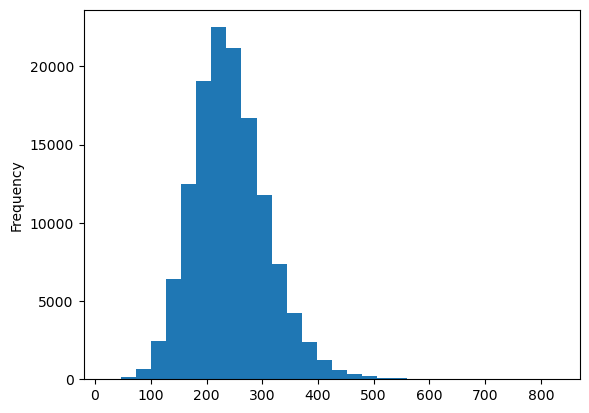

In [5]:
df['length'].plot(kind='hist', bins=30)

In [60]:
# Importing the 'regex' module as 're' for regular expression operations
import regex as re
# Defining a function called 'tokenize' that takes a text input
def tokenize(text):
    # Using regular expression to find all word tokens in the text
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [61]:
!pip install textblob

In [7]:
import pandas as pd
import regex as re

# Define the tokenize function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
df['Tokens'] = df['description'].apply(tokenize)

# Display the DataFrame with the new 'Tokens' column
print(df[['description', 'Tokens']])

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                                   Tokens  
0       [Aromas, include, tropical, fruit, broom, brim...  
1       [This, is, ripe, and, fruity, a, wine, that, i...  
2       [Tart, and, snappy, the, flavors, of, lime, fl...  
3       [Pineapple, rind, l

In [62]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [64]:
#Create a function to get the subjectivity
def getSubjectivity(case_title):
    return TextBlob(case_title).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(case_title):
    return TextBlob(case_title).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['title'].apply(getSubjectivity)
df['Polarity'] = df['title'].apply(getPolarity)

#Now display data
df.head()

points                                              title  \
0      87                  Nicosia 2013 Vulkà Bianco  (Etna)   
1      87      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2      87      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3      87  St. Julian 2013 Reserve Late Harvest Riesling ...   
4      87  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

                                         description         taster_name  \
0  Aromas include tropical fruit, broom, brimston...       Kerin O’Keefe   
1  This is ripe and fruity, a wine that is smooth...          Roger Voss   
2  Tart and snappy, the flavors of lime flesh and...        Paul Gregutt   
3  Pineapple rind, lemon pith and orange blossom ...  Alexander Peartree   
4  Much like the regular bottling from 2012, this...        Paul Gregutt   

  taster_twitter_handle  price                         designation  \
0          @kerinokeefe    NaN                        Vulkà Bianco   
1            @vossroger   15.0                            Avidagos   
2           @paulgwine    14.0                                None   
3                  None   13.0                Reserve Late Harvest   
4           @paulgwine    65.0  Vintner's Reserve Wild Child Block   

          variety             region_1           region_2  ...  \
0     White Blend                 Etna               None  ...   
1  Portuguese Red                 None               None  ...   
2      Pinot Gris    Willamette Valley  Willamette Valley  ...   
3        Riesling  Lake Michigan Shore               None  ...   
4      Pinot Noir    Willamette Valley  Willamette Valley  ...   

                winery length  \
0              Nicosia    172   
1  Quinta dos Avidagos    227   
2            Rainstorm    186   
3           St. Julian    199   
4         Sweet Cheeks    249   

                                              Tokens  \
0  [Aromas, include, tropical, fruit, broom, brim...   
1  [This, is, ripe, and, fruity, a, wine, that, i...   
2  [Tart, and, snappy, the, flavors, of, lime, fl...   
3  [Pineapple, rind, lemon, pith, and, orange, bl...   
4  [Much, like, the, regular, bottling, from, thi...   

                                              tokens num_tokens  \
0  [aromas, include, tropical, fruit, broom, brim...         22   
1  [this, ripe, fruity, a, wine, that, smooth, wh...         32   
2  [tart, snappy, flavors, lime, flesh, rind, dom...         22   
3  [pineapple, rind, lemon, pith, orange, blossom...         26   
4  [much, like, regular, bottling, from, this, co...         35   

  Bing_Liu_Score                                         paragraphs  \
0              0  Aromas include tropical fruit, broom, brimston...   
1              2  This is ripe and fruity, a wine that is smooth...   
2              3  Tart and snappy, the flavors of lime flesh and...   
3              1  Pineapple rind, lemon pith and orange blossom ...   
4              1  Much like the regular bottling from 2012, this...   

   number_of_paragraphs Subjectivity  Polarity  
0                     1        0.000     0.000  
1                     1        0.000     0.000  
2                     1        0.000     0.000  
3                     1        0.600    -0.300  
4                     1        0.525     0.225  

[5 rows x 22 columns]

In [65]:
#importing seaborn
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

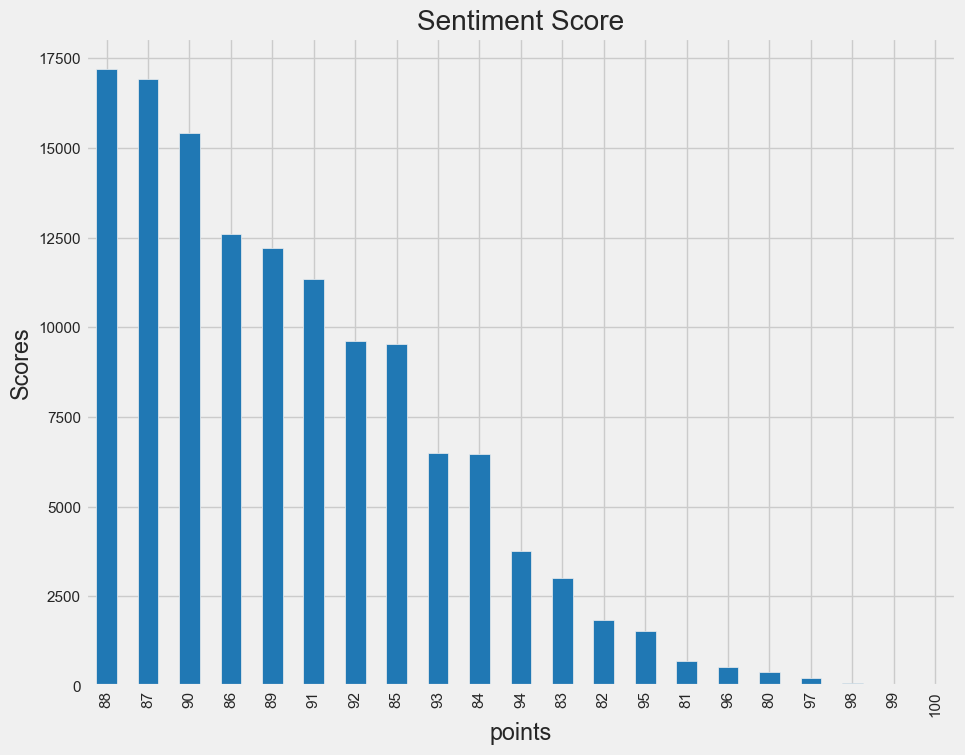

In [68]:
#Plot the values count of sentiment
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
df["Insight"] = df["Polarity"].apply(getInsight)
plt.title("Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["points"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [8]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'aren', 'himself', 'or', 's', 'a', 'why', 'can', 'to', 'shouldn', 'nor', 'same', "needn't", 'hadn', 'themselves', 'an', 'ma', 'and', 'here', "you've", 'it', 'theirs', 'with', 'more', 're', "that'll", 've', 'them', 'only', 'his', 'don', 'above', 'its', 'of', 'off', 'that', 'out', 'should', 'weren', 'having', 'yourself', 'if', "hasn't", "won't", 'isn', "wasn't", 'doing', 'into', 'ourselves', 'myself', 'him', 'she', 'for', 'when', "wouldn't", 'these', "doesn't", 'where', 'just', 'am', "it's", 'their', 'mustn', 'there', 'than', 'below', 'our', 'do', 'each', 'd', 'before', 'between', 'ours', 'over', 'wouldn', 'few', 'most', 'they', "hadn't", 'we', 'won', 'now', 'some', 'not', "shan't", "mightn't", "she's", "aren't", "you'd", 'during', "you'll", 'own', 'i', 'he', 'who', "haven't", 'mightn', 'wasn', 'at', 'will', 'm', 'very', 'so', 'the', 'under', "mustn't", 'again', 'o', 'but', 'you', 'were', 'didn', 'such', "didn't", 'shan', 'which', 'me', 'down', 'yours', 'been', 'did', 'after', "you're",

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def remove_stop(tokens):
    stop_words = set(['the', 'and', 'is', 'in', 'it', 'of', 'to'])
    return [token for token in tokens if token not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    text = str(text) if not isinstance(text, str) else text
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
df.tail()

points                                              title  \
129966      90  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...   
129967      90                  Citation 2004 Pinot Noir (Oregon)   
129968      90  Domaine Gresser 2013 Kritt Gewurztraminer (Als...   
129969      90      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)   
129970      90  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...   

                                              description         taster_name  \
129966  Notes of honeysuckle and cantaloupe sweeten th...  Anna Lee C. Iijima   
129967  Citation is given as much as a decade of bottl...        Paul Gregutt   
129968  Well-drained gravel soil gives this wine its c...          Roger Voss   
129969  A dry style of Pinot Gris, this is crisp with ...          Roger Voss   
129970  Big, rich and off-dry, this is powered by inte...          Roger Voss   

       taster_twitter_handle  price                             designation  \
129966                  None   28.0  Brauneberger Juffer-Sonnenuhr Spätlese   
129967           @paulgwine    75.0                                    None   
129968            @vossroger   30.0                                   Kritt   
129969            @vossroger   32.0                                    None   
129970            @vossroger   21.0           Lieu-dit Harth Cuvée Caroline   

               variety region_1      region_2 province  country  \
129966        Riesling     None          None    Mosel  Germany   
129967      Pinot Noir   Oregon  Oregon Other   Oregon       US   
129968  Gewürztraminer   Alsace          None   Alsace   France   
129969      Pinot Gris   Alsace          None   Alsace   France   
129970  Gewürztraminer   Alsace          None   Alsace   France   

                                          winery  length  \
129966  Dr. H. Thanisch (Erben Müller-Burggraef)     227   
129967                                  Citation     233   
129968                           Domaine Gresser     225   
129969                      Domaine Marcel Deiss     216   
129970                          Domaine Schoffit     169   

                                                   Tokens  \
129966  [Notes, of, honeysuckle, and, cantaloupe, swee...   
129967  [Citation, is, given, as, much, as, a, decade,...   
129968  [Well-drained, gravel, soil, gives, this, wine...   
129969  [A, dry, style, of, Pinot, Gris, this, is, cri...   
129970  [Big, rich, and, off-dry, this, is, powered, b...   

                                                   tokens  num_tokens  
129966  [notes, honeysuckle, cantaloupe, sweeten, this...          27  
129967  [citation, given, as, much, as, a, decade, bot...          31  
129968  [well-drained, gravel, soil, gives, this, wine...          31  
129969  [a, dry, style, pinot, gris, this, crisp, with...          31  
129970  [big, rich, off-dry, this, powered, by, intens...          21

In [10]:
testtokens = ["This", "is", "a", "test", "description"]
stopwords = set(['the', 'and', 'is', 'in', 'it', 'of', 'to'])
cleantokens = remove_stop(testtokens, stopwords)
print(cleantokens)


TypeError: remove_stop() takes 1 positional argument but 2 were given

In [11]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [12]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('a', 179904), ('with', 120505), ('this', 114192), ('wine', 80255), ('flavors', 62787)]


In [13]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

freq
tokens         
a        179904
with     120505
this     114192
wine      80255
flavors   62787
s         51832
on        45493
fruit     45169
that      40544
aromas    39637

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

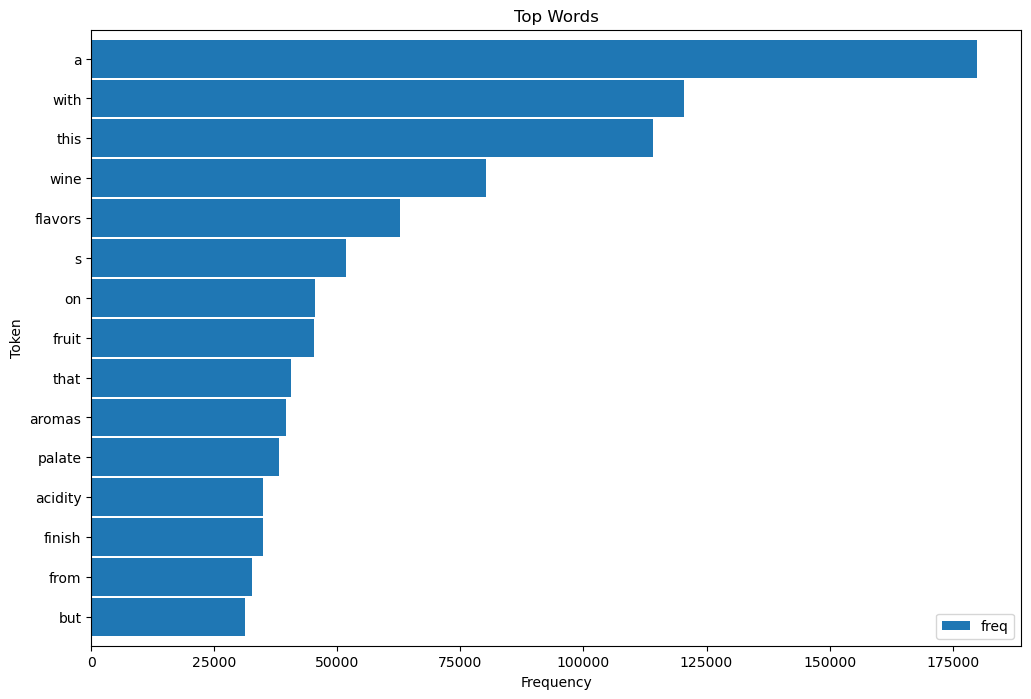

In [14]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [15]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


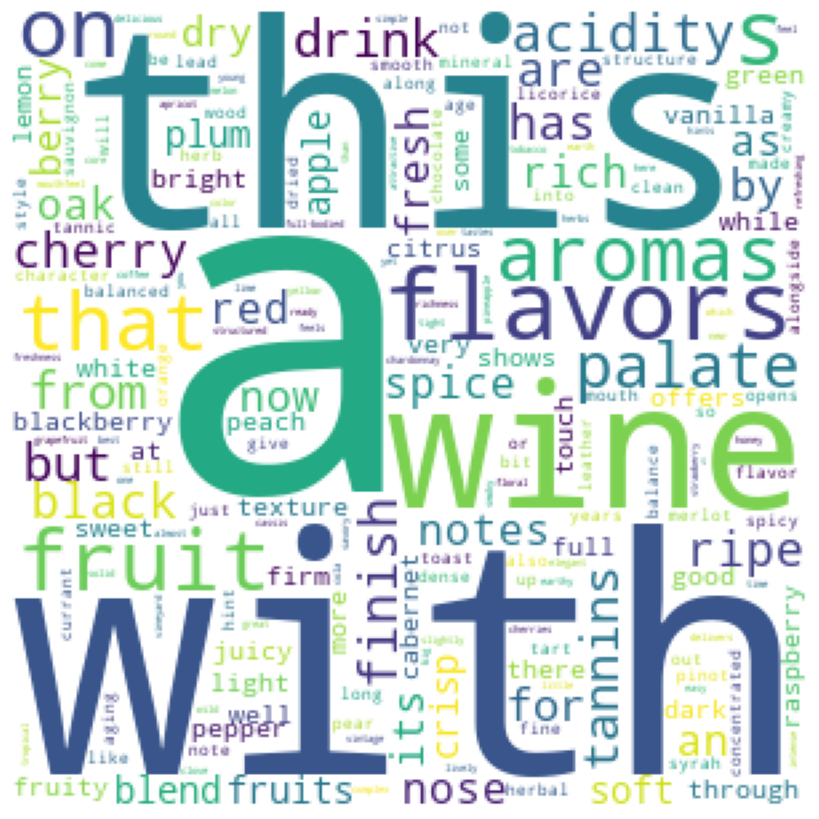

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [18]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [19]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

freq         tfidf
tokens                       
a        179904  60222.820116
with     120505  62652.768062
this     114192  43044.706181
wine      80255  64089.296386
flavors   62787  55188.822326

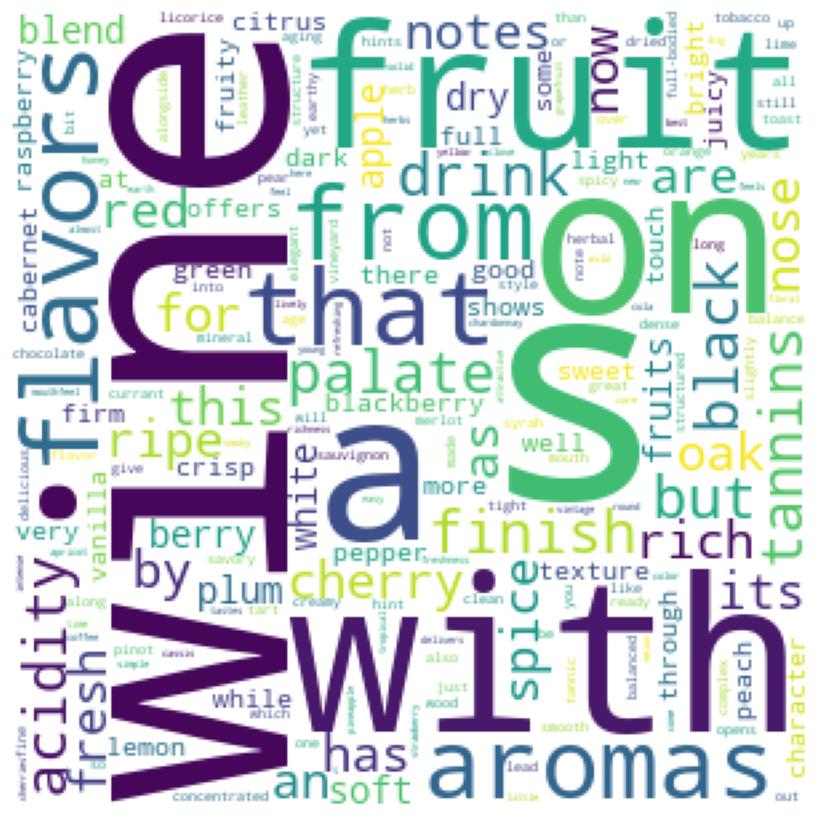

In [20]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [22]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [23]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

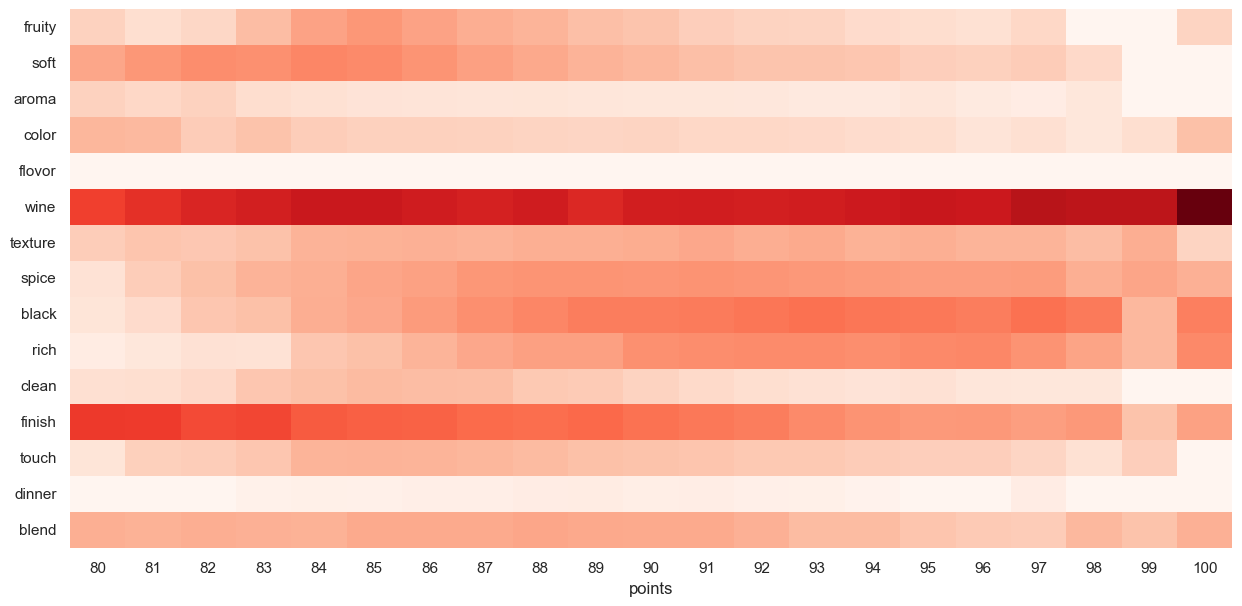

In [24]:
import seaborn as sns
keywords = ['fruity', 'soft', 'aroma', 'color',
    'flovor', 'wine', 'texture', 'spice', 'black',
    'rich', 'clean', 'finish','touch', 'dinner','blend']
freq_df = count_keywords_by(df, by='points', keywords=keywords)
# compute relative frequencies based on total number of tokens per points
freq_df = freq_df.div(df.groupby('points')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
plt.show()

In [25]:
#get bing liu 

In [26]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [27]:
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
    word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
#Function to do the math
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

In [29]:
df['description'].fillna('no review', inplace=True)
df['Bing_Liu_Score'] = df['description'].apply(bing_liu_score)

In [30]:
df[['price',"description", 'Bing_Liu_Score']].head(10)

price                                        description  Bing_Liu_Score
0    NaN  Aromas include tropical fruit, broom, brimston...               0
1   15.0  This is ripe and fruity, a wine that is smooth...               2
2   14.0  Tart and snappy, the flavors of lime flesh and...               3
3   13.0  Pineapple rind, lemon pith and orange blossom ...               1
4   65.0  Much like the regular bottling from 2012, this...               1
5   15.0  Blackberry and raspberry aromas show a typical...               2
6   16.0  Here's a bright, informal red that opens with ...               4
7   24.0  This dry and restrained wine offers spice in p...               2
8   12.0  Savory dried thyme notes accent sunnier flavor...               5
9   27.0  This has great depth of flavor with its fresh ...               4

In [31]:
df.groupby('price').agg({'Bing_Liu_Score':'mean'})

Bing_Liu_Score
price                 
4.0           2.181818
5.0           2.434783
6.0           2.133333
7.0           2.418014
8.0           2.308296
...                ...
1900.0        4.000000
2000.0        5.500000
2013.0        1.000000
2500.0        5.000000
3300.0        5.000000

[390 rows x 1 columns]

In [32]:
##classwork 6 

In [33]:
from nltk.corpus import stopwords #you can remove stop words for speed
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [67]:
data = open("C:\\Users\\sowky\\Downloads\\winemag-data-130k-v2.json")
filedata = data.readlines()
article = filedata[0].split(". ") #Just do the first paragraph
sentences = []
for sentence in article:
    print(sentence)
    sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [35]:
print("Sentences are ", sentences)

Sentences are  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [36]:
def sentence_similarity(sent1, sent2):
    # Convert words to lowercase
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
    
    # Get unique words from both sentences
    all_words = list(set(sent1 + sent2))
    
    # Initialize vectors
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    # Build the vector for the first sentence
    for w in sent1:
        vector1[all_words.index(w)] += 1
    
    # Build the vector for the second sentence
    for w in sent2:
        vector2[all_words.index(w)] += 1
    
    # Calculate cosine similarity between the two vectors
    return 1 - cosine_distance(vector1, vector2)



In [ ]:
import numpy as np
from scipy.spatial.distance import cosine
from scipy.sparse import lil_matrix


In [ ]:
similarity_matrix = np.zeros((len(sentences), len(sentences)))
for idx1 in range(len(sentences)):
    for idx2 in range(len(sentences)):
        if idx1 == idx2: # Ignore if both are the same sentences
            continue
        similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2])
similarity_matrix = similarity_matrix.tocsr()
print("Similarity matrix:\n", similarity_matrix)


In [ ]:
# Step 3 - Rank sentences in similarity matrix
sentence_similarity_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(sentence_similarity_graph)
print("scores", scores)

In [ ]:
# Step 4 - Sort the rank and pick top sentences
ranked_sentence = sorted(((scores[i],s) for i,s in
enumerate(sentences)), reverse=True)
print("Indexes of top ranked_sentence order are \n\n",
ranked_sentence)

In [ ]:
# Step 5 - How many sentences to pick
n = int(input("How many sentences do you want in the summary? "))
#n=2
summarize_text = []
for i in range(n):
    summarize_text.append(" ".join(ranked_sentence[i][1]))

In [ ]:
# Step 6 - Offcourse, output the summarize text
print("Summarize Text: \n", ". ".join(summarize_text))

In [38]:
#Look at a couple of texts
print(repr(df.iloc[2666]["description"][0:400]))
print(repr(df.iloc[4726]["description"][0:400]))

"This is rich in black cherry flavors, with layered accents of white pepper, almond and walnut. It's the perfect marriage between the elegance of Valpolicella and the structure of Amarone. Imported by Panebianco, Vinity Wine Company."
"Perfumed aromas of cherry, forest floor and cinnamon bring appeal to this light-colored wine. It's delicate and airy in style, with cranberry flavors on the finish."


In [39]:
import re
df["paragraphs"] = df["description"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


In [40]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
stopwords_list = list(stopwords)
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['description'])
tfidf_text_vectors.shape


C:\Users\sowky\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(129971, 12230)

In [44]:
# flatten the paragraphs keeping the price
paragraph_df = pd.DataFrame([
    { "description": paragraph, "price": price }
    for paragraphs, price in zip(df["paragraphs"], df["price"])
        for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

description  price
0  Aromas include tropical fruit, broom, brimston...    NaN
1  This is ripe and fruity, a wine that is smooth...   15.0
2  Tart and snappy, the flavors of lime flesh and...   14.0
3  Pineapple rind, lemon pith and orange blossom ...   13.0
4  Much like the regular bottling from 2012, this...   65.0
5  Blackberry and raspberry aromas show a typical...   15.0
6  Here's a bright, informal red that opens with ...   16.0
7  This dry and restrained wine offers spice in p...   24.0
8  Savory dried thyme notes accent sunnier flavor...   12.0
9  This has great depth of flavor with its fresh ...   27.0

In [45]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

In [46]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]]*100.0/total)))
display_topics(nmf_text_model,
tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 black (8.01)
 pepper (2.39)
 dark (2.18)
 blackberry (2.04)
 currant (1.72)

Topic 01
 wine (3.57)
 fruits (2.69)
 tannins (1.95)
 wood (1.92)
 drink (1.82)

Topic 02
 apple (2.24)
 white (1.87)
 peach (1.61)
 lemon (1.53)
 citrus (1.51)

Topic 03
 cherry (2.37)
 palate (2.07)
 alongside (2.03)
 tannins (1.96)
 offers (1.91)

Topic 04
 crisp (4.34)
 fruity (4.00)
 acidity (3.88)
 light (3.79)
 fresh (3.35)

Topic 05
 cabernet (7.05)
 sauvignon (4.83)
 blend (4.41)
 merlot (3.97)
 franc (2.83)

Topic 06
 finish (2.62)
 berry (2.59)
 plum (2.40)
 aromas (2.03)
 herbal (1.95)

Topic 07
 ripe (8.90)
 soft (8.12)
 texture (3.54)
 smooth (3.45)
 drink (3.04)

Topic 08
 fruit (8.07)
 spice (1.79)
 barrel (1.15)
 wine (1.14)
 notes (0.93)

Topic 09
 sweet (1.94)
 flavors (1.76)
 oak (1.56)
 dry (1.31)
 pinot (1.24)


In [47]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Flatten the list of lists into a list of strings, if necessary
df['paragraphs'] = df['paragraphs'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize TF-IDF vectorizer and transform the paragraphs
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(df['paragraphs'])

# Initialize NMF model
nmf_para_model = NMF(n_components=10, random_state=42)

# Fit NMF model to the TF-IDF vectors
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Function to display topics
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 0:
black pepper dark blackberry currant cherry tannins plum chocolate licorice
Topic 1:
wine fruits tannins wood drink aging rich structure firm age
Topic 2:
apple white peach lemon citrus pear palate lime green finish
Topic 3:
cherry palate alongside tannins offers aromas red spice berry dried
Topic 4:
crisp fruity acidity light fresh wine bright red drink attractive
Topic 5:
cabernet sauvignon blend merlot franc verdot petit syrah malbec sangiovese
Topic 6:
finish berry plum aromas herbal flavors feels notes earthy palate
Topic 7:
ripe soft texture smooth drink ready wine rich rounded warm
Topic 8:
fruit spice barrel wine notes followed tropical shows stone dark
Topic 9:
sweet flavors oak dry pinot cherry like vanilla good noir


In [48]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0


array([ 6.80537532, 12.17113048, 12.46332027, 10.48142749,  9.57763132,
        6.67283315,  9.29043226,  9.13216334, 12.17171346, 11.23397291])

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define stopwords if not defined earlier
stopwords = set(['the', 'and', 'is', 'in', 'it', 'of', 'to'])  # Example stopwords list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier and has a 'description' column
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

# Function to display topics
def display_topics_lda(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics for LDA
display_topics_lda(lda_para_model, count_para_vectorizer.get_feature_names_out())


Shape of document-term matrix: (129971, 12488)
Topic 0:
with palate on flavors apple aromas finish acidity white peach
Topic 1:
with flavors aromas finish on palate berry are plum but
Topic 2:
with flavors wine cherry finish bodied fruit full now tannins
Topic 3:
wine with acidity drink has ripe that fruity crisp flavors
Topic 4:
with on palate wine flavors fruit but that nose finish
Topic 5:
palate black aromas cherry with tannins on red nose spice
Topic 6:
with wine aromas fruit that spice or by bright cherry
Topic 7:
wine from with tannins fruit that drink black has fruits
Topic 8:
with wine fruit from oak vineyard flavors that are its
Topic 9:
with flavors but wine for that dry sweet now not


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

Shape of document-term matrix: (129971, 12488)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
print(count_para_vectors.shape)


(129971, 12488)


In [52]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
with palate on flavors apple

Topic 2:
with flavors aromas finish on

Topic 3:
with flavors wine cherry finish

Topic 4:
wine with acidity drink has

Topic 5:
with on palate wine flavors

Topic 6:
palate black aromas cherry with

Topic 7:
with wine aromas fruit that

Topic 8:
wine from with tannins fruit

Topic 9:
with wine fruit from oak

Topic 10:
with flavors but wine for


In [53]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([10.99206417, 10.85004999, 10.19582444, 11.39895249,  9.6548221 ,
       11.41917445,  6.16123445,  9.87406962,  9.38392086, 10.06988742])

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

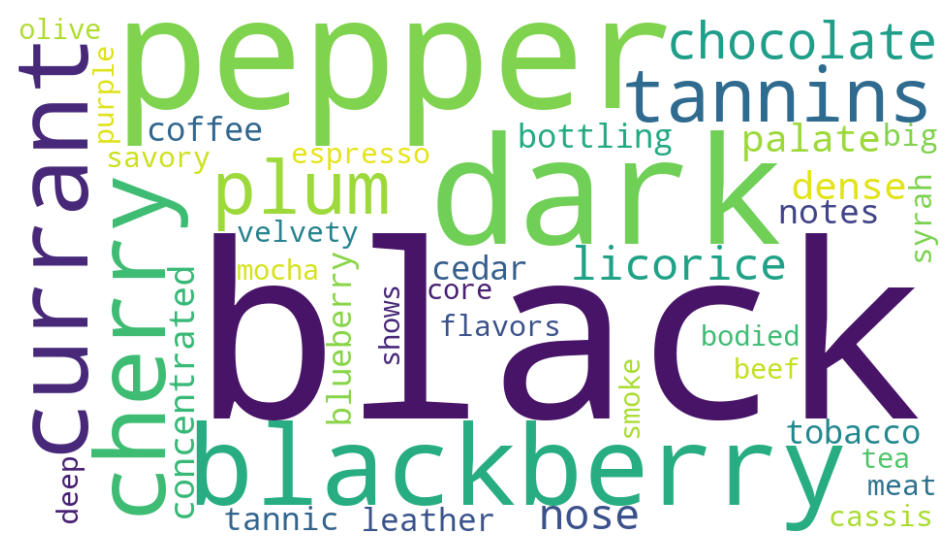

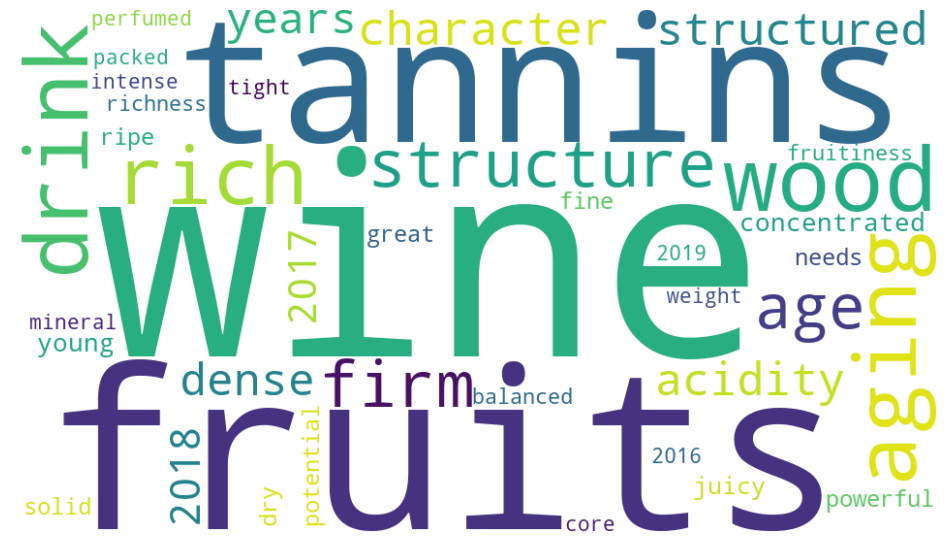

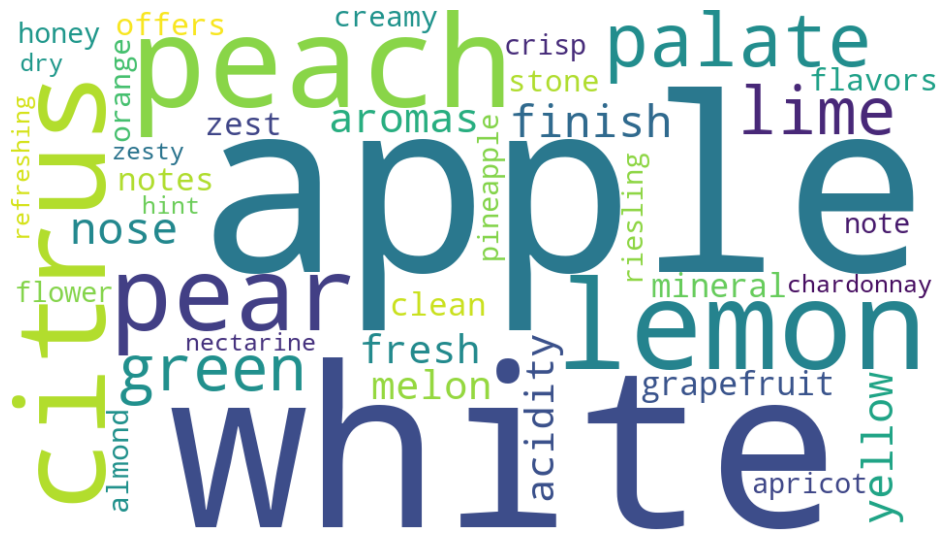

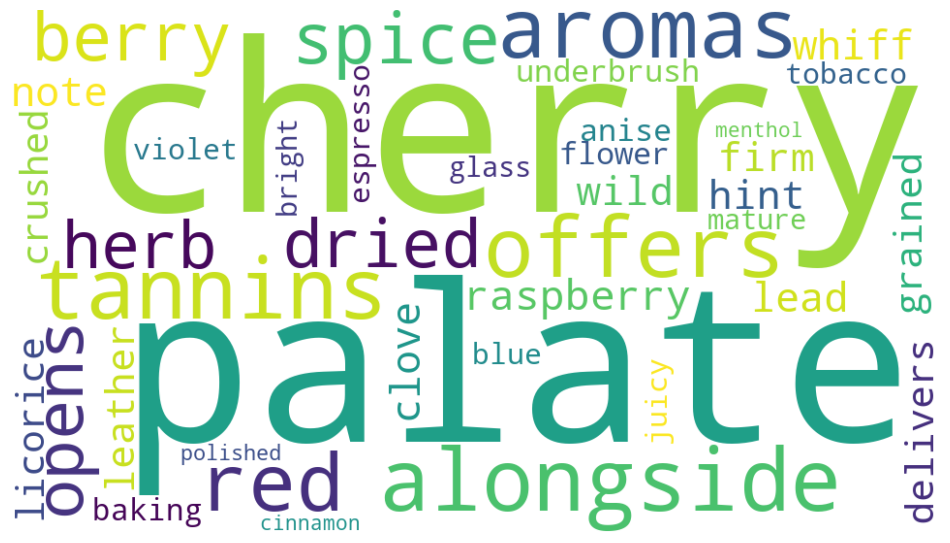

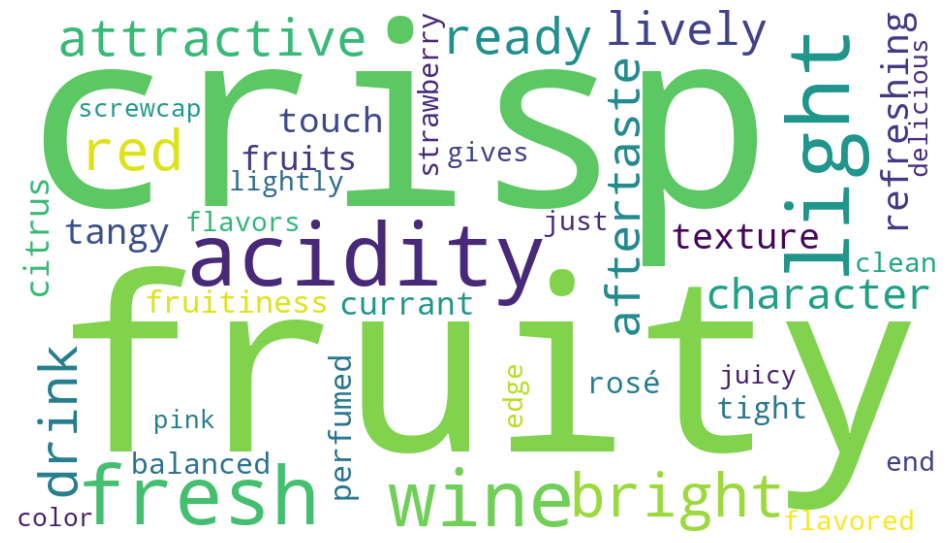

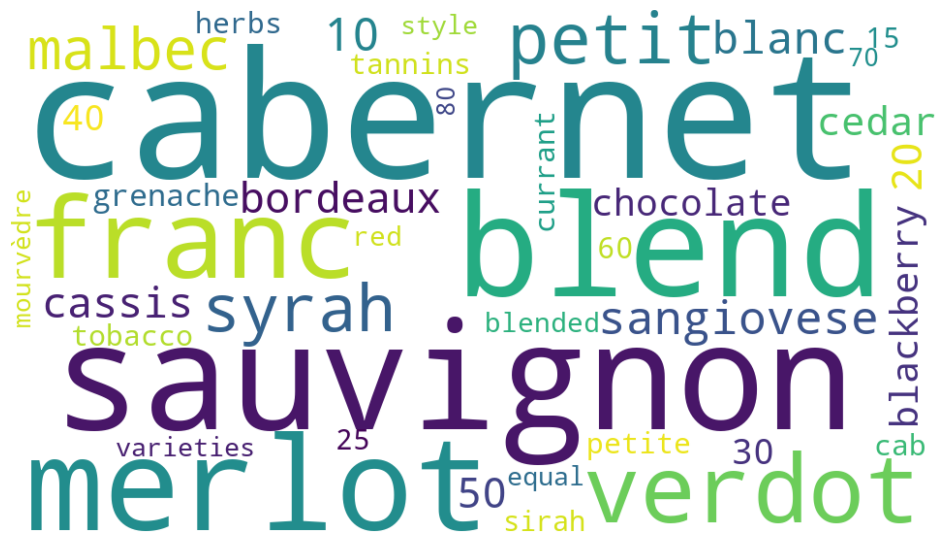

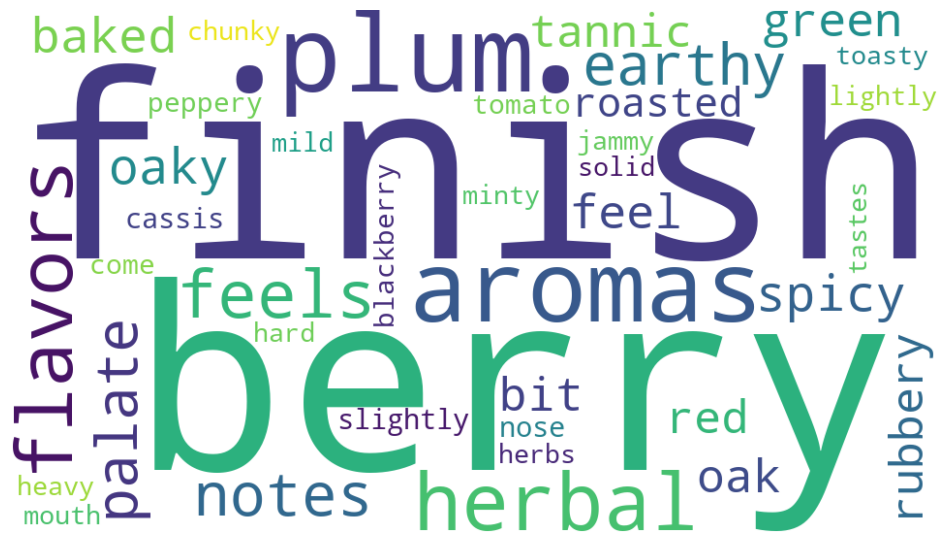

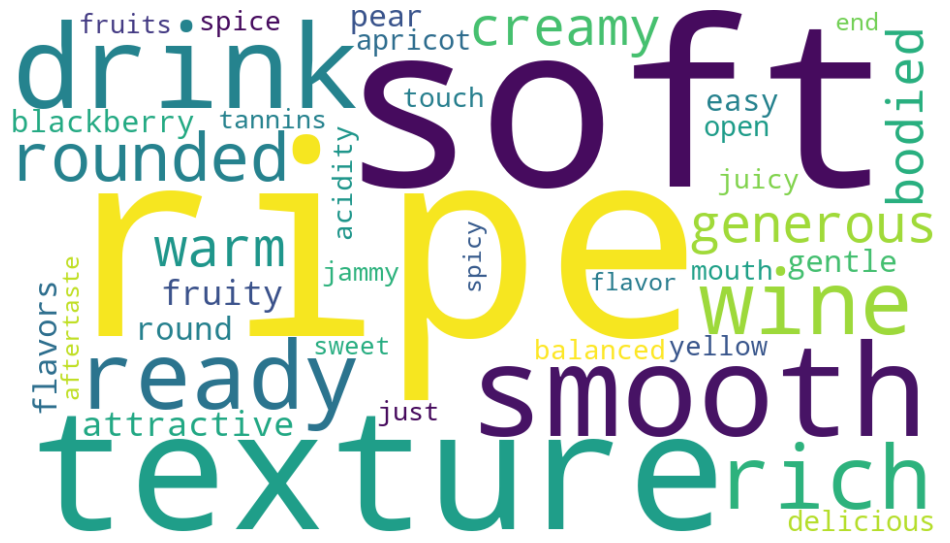

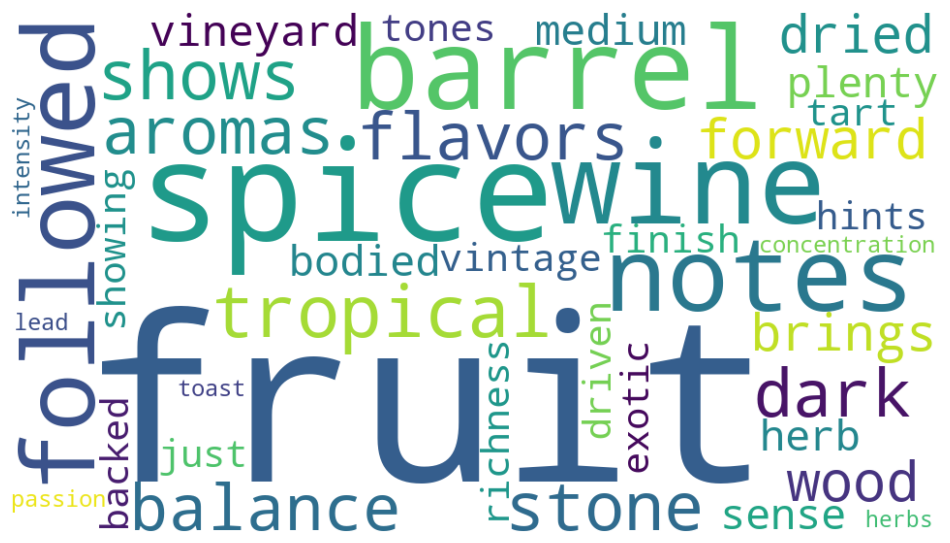

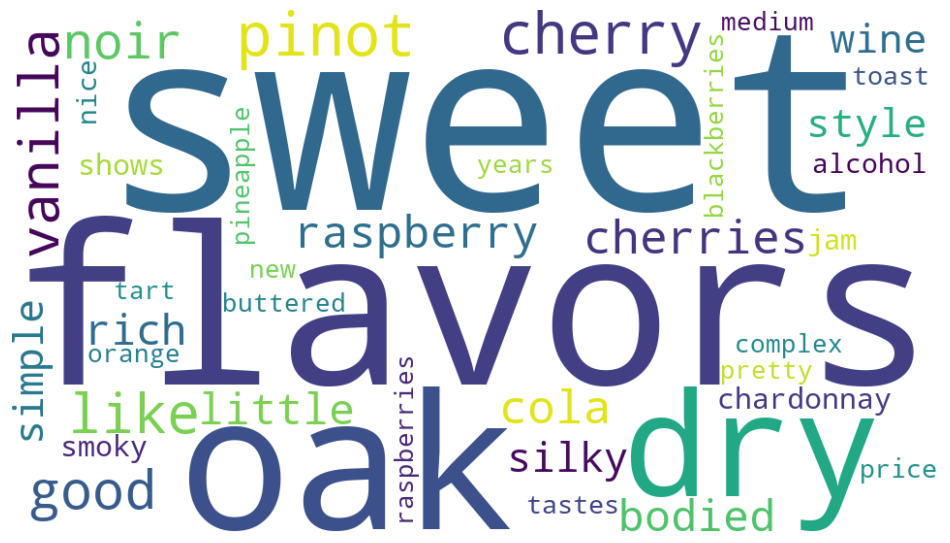

In [55]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

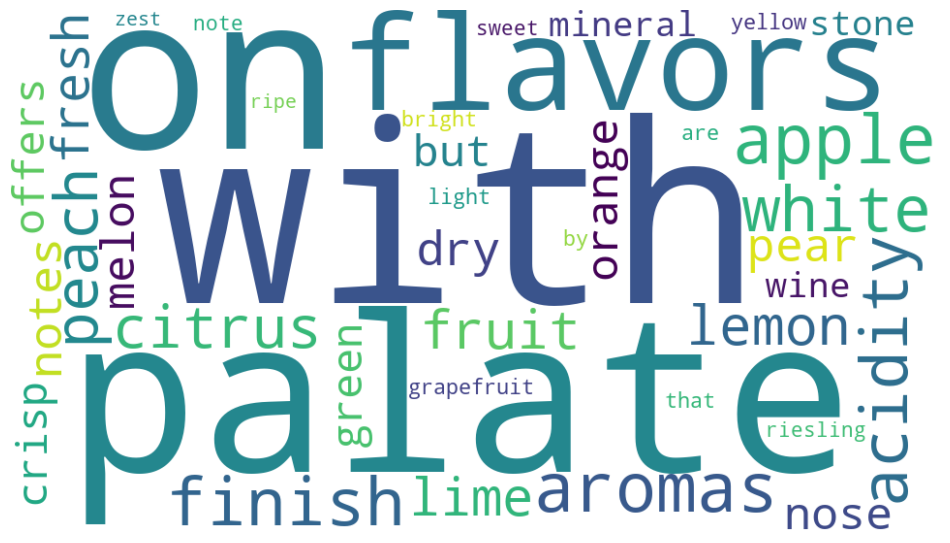

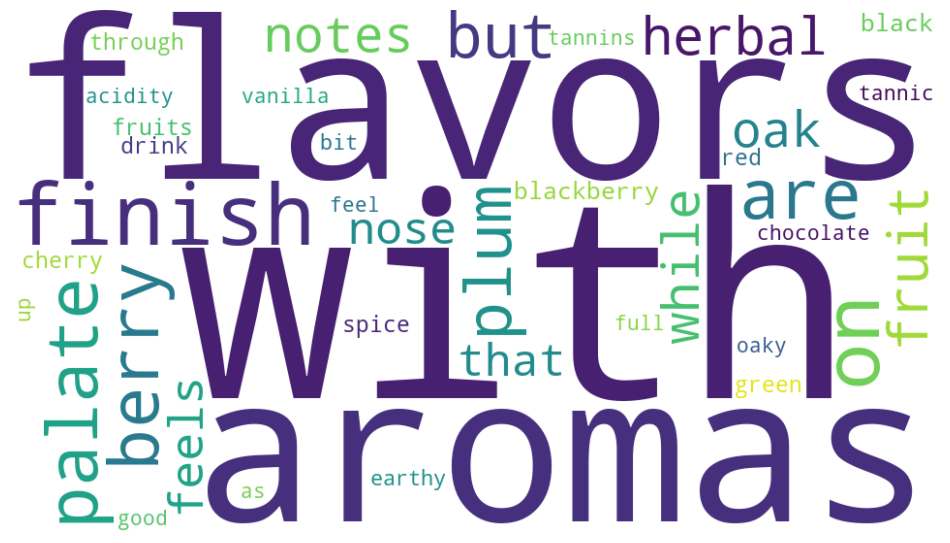

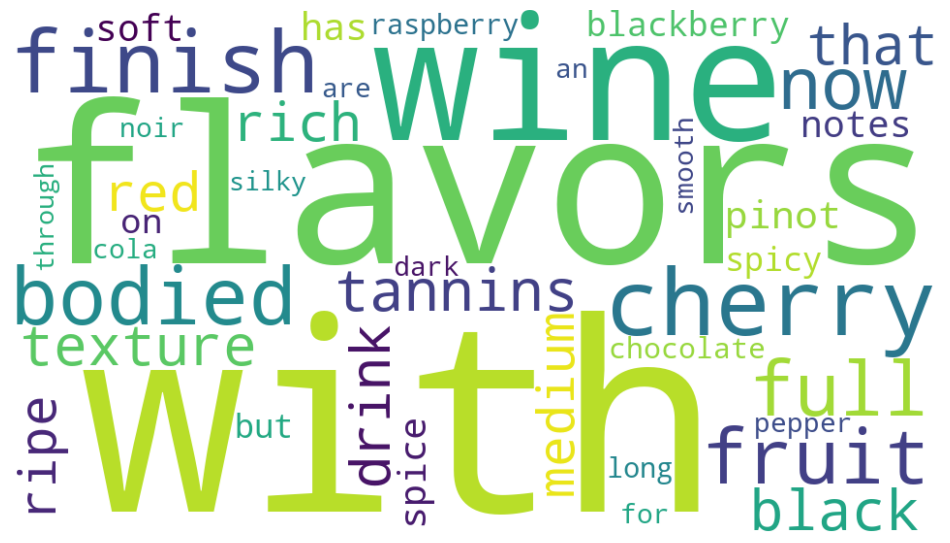

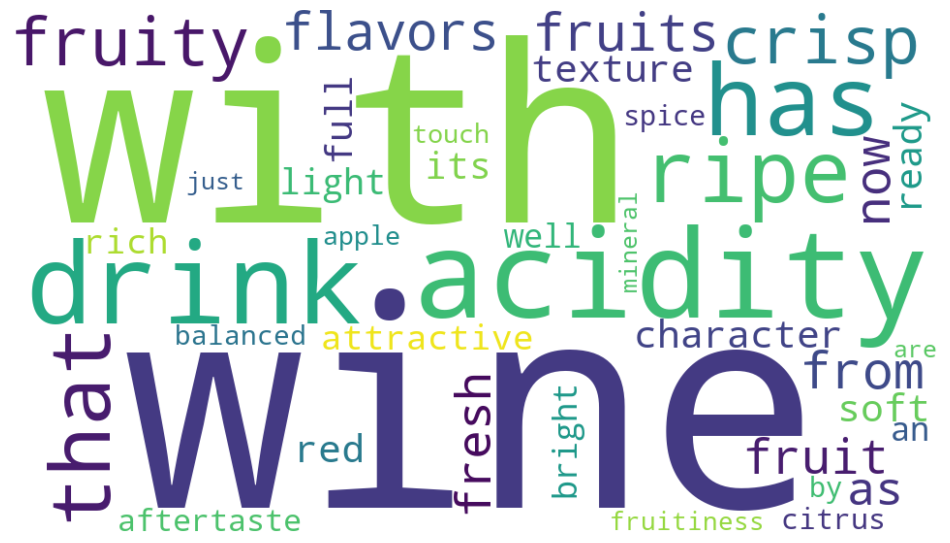

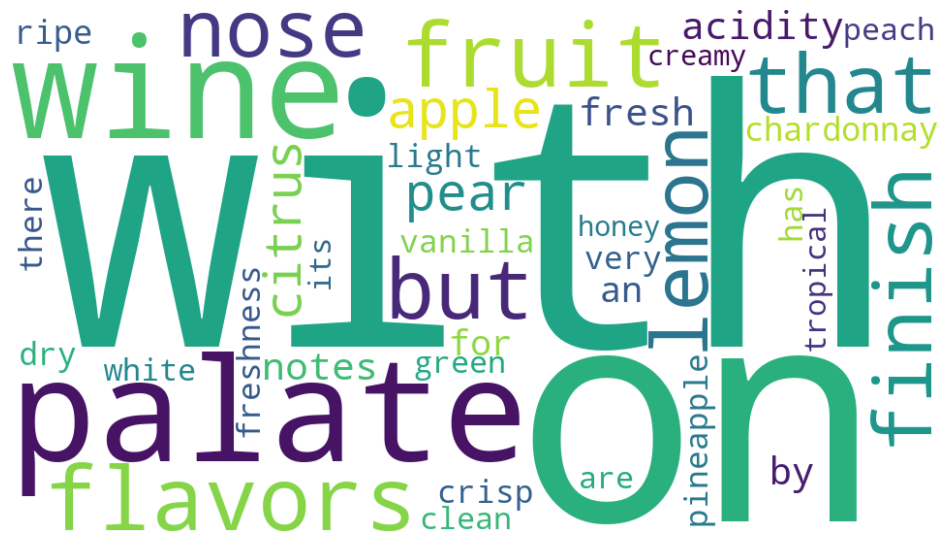

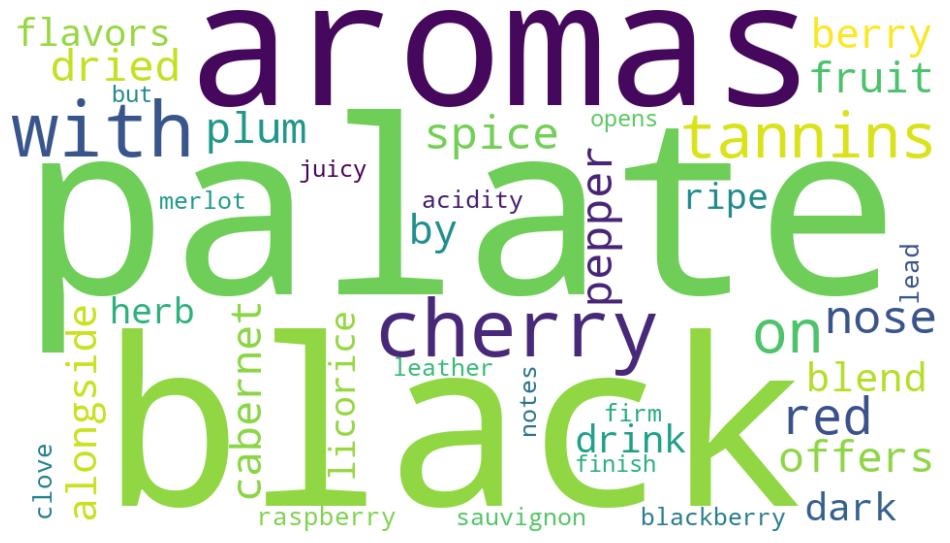

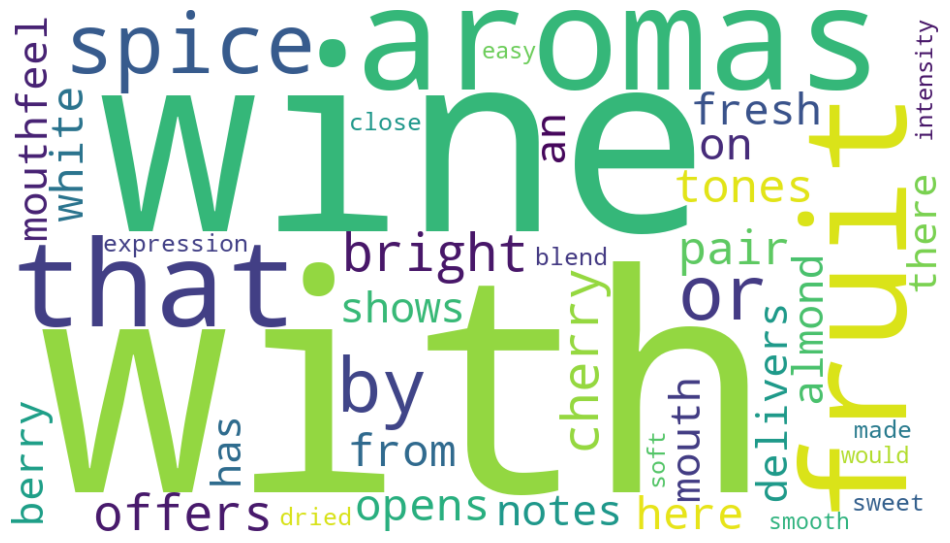

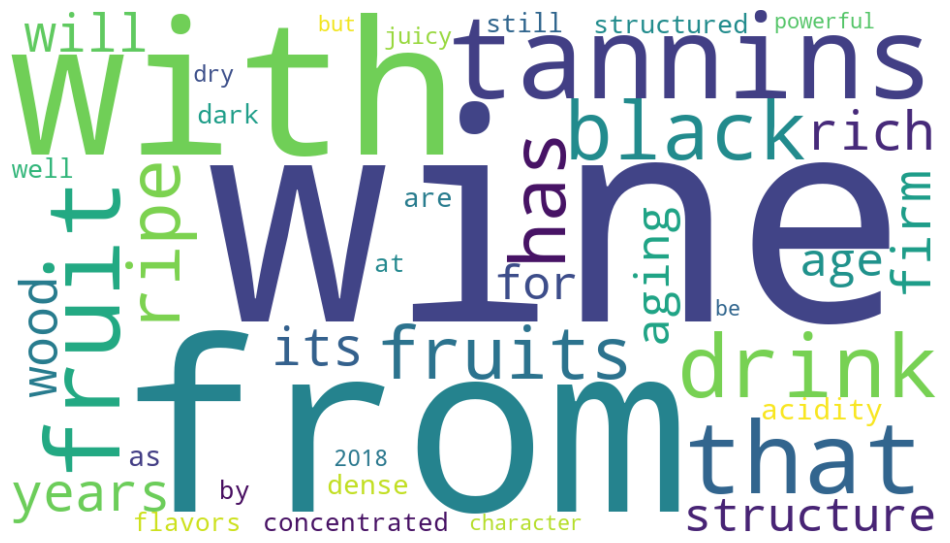

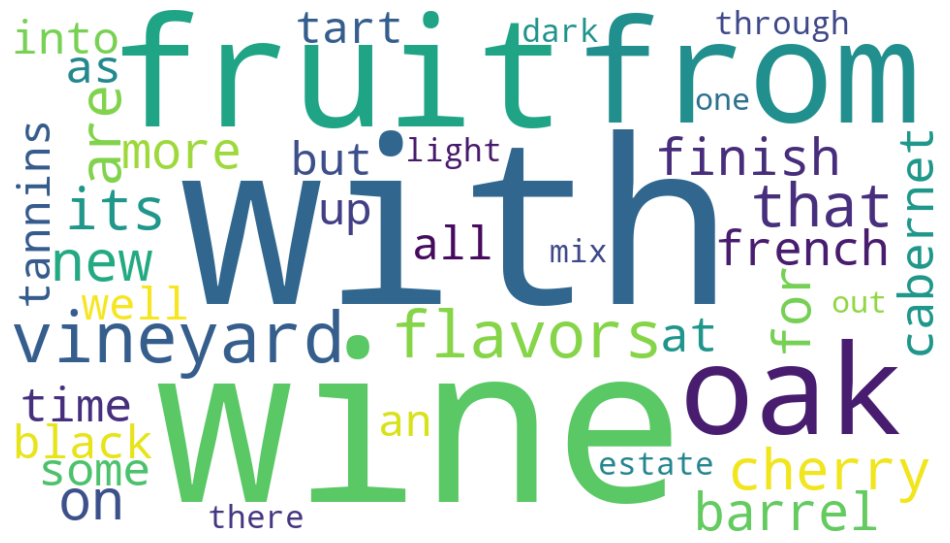

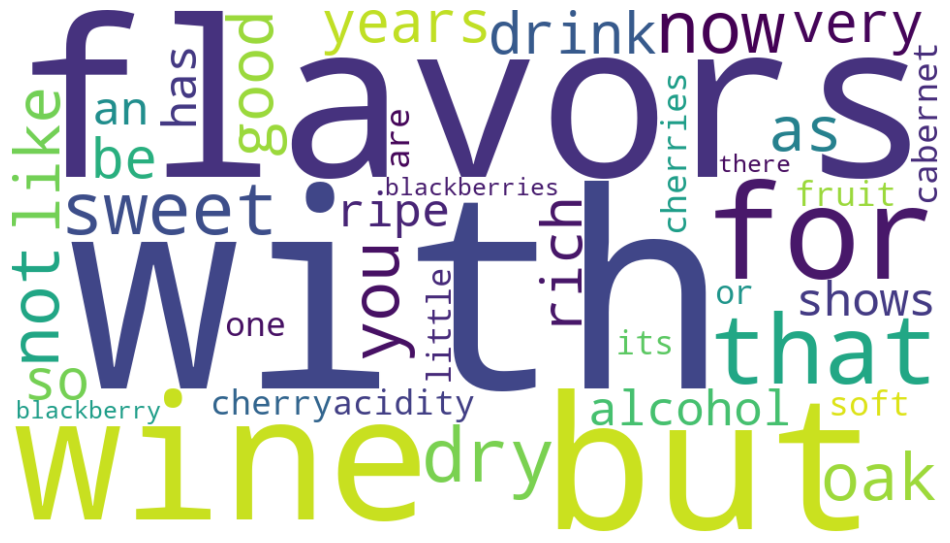

In [56]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [57]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

In [69]:
from tqdm.auto import tqdm
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'paragraph_df' is your DataFrame and contains 'description' and 'price' columns

# Initialize the NMF model (assuming it hasn't been fitted yet)
n_components = 10  # Set the number of components as required
nmf_para_model = NMF(n_components=n_components, random_state=42)

# Vectorize the paragraphs using TF-IDF
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df['description'])

# Fit the NMF model on the entire TF-IDF matrix
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Get unique prices
unique_price = np.unique(paragraph_df["price"])

# List to store price data with aggregated topic weights
price_data = []

# Process each unique price
for price in tqdm(unique_price):
    price_indices = paragraph_df["price"] == price
    if np.any(price_indices):  # Check if there are samples available for the current price
        # Transform the TF-IDF vectors of the selected paragraphs
        W_price = nmf_para_model.transform(tfidf_para_vectors[price_indices])
        
        # Aggregate the topic weights for the current price
        aggregated_weights = W_price.sum(axis=0) / W_price.sum() * 100.0
        
        # Append the result for the current price
        price_data.append([price] + list(aggregated_weights))

# Display the results
for data in price_data:
    print(f"Price: {data[0]}, Topic Weights: {data[1:]}")


  0%|          | 0/391 [00:00<?, ?it/s]

Price: 4.0, Topic Weights: [1.4067697177819616, 2.4926681400026385, 17.28870531368732, 12.758108314041767, 6.329939492015045, 4.557907041698555, 22.85081240931226, 6.724216117354796, 5.97116376994212, 19.61970968416354]
Price: 5.0, Topic Weights: [1.7881604988839461, 5.028610437998517, 11.12125860987846, 7.773915718785555, 18.586850843814947, 2.653816181661267, 14.295095610524184, 13.761838131779875, 7.490028531274792, 17.500425435398462]
Price: 6.0, Topic Weights: [3.1882603223585897, 6.946150666473243, 15.41472645498311, 5.739959563303286, 17.917827934160464, 1.884793275146199, 10.783768796523594, 12.33787527178605, 10.622766633487998, 15.16387108177748]
Price: 7.0, Topic Weights: [3.3560328978131055, 7.8311816750404315, 13.580594099043294, 5.183582080946739, 17.510949377571656, 3.692999789762196, 11.942898550480024, 12.923653453710134, 10.040012144435435, 13.938095931196978]
Price: 8.0, Topic Weights: [2.8707423748472816, 7.022005274001438, 13.905722339227102, 5.60506850100648, 16.6

In [58]:
from tqdm.auto import tqdm
import numpy as np

price_data = []

unique_price = np.unique(paragraph_df["price"])

# Assuming 'paragraphs' is the column containing your paragraph data
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df['description'])

for price in tqdm(unique_price):
    price_indices = np.array(paragraph_df["price"] == price)
    if np.any(price_indices):  # Check if there are samples available for the current price
        # Ensure that nmf_para_model is fitted before using it
        W_price = nmf_para_model.transform(tfidf_para_vectors[price_indices].toarray())
        price_data.append([price] + list(W_price.sum(axis=0) / W_price.sum() * 100.0))

  0%|          | 0/391 [00:00<?, ?it/s]